In [1]:
%display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

h = var("h")
a = var("a")

In [4]:
n_layers = 2

In [5]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("mu += [mu_" + str(i) +"]")

In [6]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [7]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("A_z += [A_z_" + str(i) +"]")

In [8]:
A_r = []
for i in range(n_layers):
    exec("A_r_" + str(i) + "= var('A_r_" + str(i) + "')")
    exec("A_r += [A_r_" + str(i) +"]")

In [9]:
A_z,A_r

([A_z_0, A_z_1], [A_r_0, A_r_1])

In [10]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("B_z += [B_z_" + str(i) +"]")

In [11]:
B_r = []
for i in range(n_layers):
    exec("B_r_" + str(i) + "= var('B_r_" + str(i) + "')")
    exec("B_r += [B_r_" + str(i) +"]")

In [12]:
B_z,B_r

([B_z_0, B_z_1], [B_r_0, B_r_1])

In [13]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("k += [k_" + str(i) +"]")

In [14]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [15]:
E_r = []
for i in range(n_layers):
    exec("Erh_" + str(i) + " = function('E_r_" + str(i) + "', nargs=2)")
    exec("E_r += [Erh_" + str(i) +"]")

In [16]:
E_r[0](rh,ph)

E_r_0(rho, varphi)

In [17]:
E_rh = []
for i in range(n_layers):
    E_rh += [lambda rh,ph,z, i=i: E_r[i](rh,ph)*(B_r[i]*sin(k[i]*z)+A_r[i]*cos(k[i]*z))]

In [18]:
E_rh[0](rh,ph,z)

(A_r_0*cos(k_0*z) + B_r_0*sin(k_0*z))*E_r_0(rho, varphi)

In [19]:
E_rh[1](rh,ph,z)

(A_r_1*cos(k_1*z) + B_r_1*sin(k_1*z))*E_r_1(rho, varphi)

In [20]:
E_z = []
for i in range(n_layers):
    E_z += [lambda rh,ph,z, i=i: bessel_J(0,kappa*rh)*(B_z[i]*sin(k[i]*z)+A_z[i]*cos(k[i]*z))]

In [21]:
E_z[0](rh,ph,z)

(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*bessel_J(0, kappa*rho)

In [22]:
E_z[1](rh,ph,z)

(A_z_1*cos(k_1*z) + B_z_1*sin(k_1*z))*bessel_J(0, kappa*rho)

In [23]:
rotE_ph =[]
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda rh,ph,z, i=i: " + str(E_rh[i](rh,ph,z).diff(z)-E_z[i](rh,ph,z).diff(rh)) +"]"))

In [24]:
rotE_ph[0](rh,ph,z)

1/2*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho)) + (B_r_0*k_0*cos(k_0*z) - A_r_0*k_0*sin(k_0*z))*E_r_0(rho, varphi)

In [25]:
rotE_ph[1](rh,ph,z)

1/2*(A_z_1*cos(k_1*z) + B_z_1*sin(k_1*z))*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho)) + (B_r_1*k_1*cos(k_1*z) - A_r_1*k_1*sin(k_1*z))*E_r_1(rho, varphi)

In [26]:
H_ph = []
for i in range(n_layers):
    H_ph += [lambda rh,ph,z, i=i : rotE_ph[i](rh,ph,z)*c/(I*omega *mu[i])]

In [27]:
H_ph[0](rh,ph,z)

-1/2*I*((A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho)) + 2*(B_r_0*k_0*cos(k_0*z) - A_r_0*k_0*sin(k_0*z))*E_r_0(rho, varphi))*c/(mu_0*omega)

In [28]:
H_ph[1](rh,ph,z)

-1/2*I*((A_z_1*cos(k_1*z) + B_z_1*sin(k_1*z))*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho)) + 2*(B_r_1*k_1*cos(k_1*z) - A_r_1*k_1*sin(k_1*z))*E_r_1(rho, varphi))*c/(mu_1*omega)

In [29]:
rotH_rh = []
for i in range(n_layers):
    exec(preparse("rotH_rh += [lambda rh,ph,z, i=i : " + str(- H_ph[i](rh,ph,z).diff(z)) + "]"))

In [30]:
rotH_rh[0](rh,ph,z)

-1/2*(-I*(B_z_0*k_0*cos(k_0*z) - A_z_0*k_0*sin(k_0*z))*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho)) + 2*I*(A_r_0*k_0^2*cos(k_0*z) + B_r_0*k_0^2*sin(k_0*z))*E_r_0(rho, varphi))*c/(mu_0*omega)

In [31]:
rotH_rh[1](rh,ph,z)

-1/2*(-I*(B_z_1*k_1*cos(k_1*z) - A_z_1*k_1*sin(k_1*z))*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho)) + 2*I*(A_r_1*k_1^2*cos(k_1*z) + B_r_1*k_1^2*sin(k_1*z))*E_r_1(rho, varphi))*c/(mu_1*omega)

In [32]:
eqE_rh = []
for i in range(n_layers):
    eqE_rh += [rotH_rh[i](rh,ph,z) == -I * omega / c * epsilon[i] * E_rh[i](rh,ph,z) ]

In [33]:
eqE_rh[0]

-1/2*(-I*(B_z_0*k_0*cos(k_0*z) - A_z_0*k_0*sin(k_0*z))*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho)) + 2*I*(A_r_0*k_0^2*cos(k_0*z) + B_r_0*k_0^2*sin(k_0*z))*E_r_0(rho, varphi))*c/(mu_0*omega) == -I*(A_r_0*cos(k_0*z) + B_r_0*sin(k_0*z))*epsilon_0*omega*E_r_0(rho, varphi)/c

In [34]:
eqE_rh[1]

-1/2*(-I*(B_z_1*k_1*cos(k_1*z) - A_z_1*k_1*sin(k_1*z))*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho)) + 2*I*(A_r_1*k_1^2*cos(k_1*z) + B_r_1*k_1^2*sin(k_1*z))*E_r_1(rho, varphi))*c/(mu_1*omega) == -I*(A_r_1*cos(k_1*z) + B_r_1*sin(k_1*z))*epsilon_1*omega*E_r_1(rho, varphi)/c

In [35]:
E_rs = []
for i in range(n_layers):
    exec(preparse("E_rs += [lambda rh,ph,i=i : " + str(solve(eqE_rh[i], E_r[i](rh,ph))[0].rhs()) +"]"))

In [36]:
E_rs[0](rh,ph)

(B_z_0*c^2*k_0*kappa*bessel_J(1, kappa*rho)*cos(k_0*z) - A_z_0*c^2*k_0*kappa*bessel_J(1, kappa*rho)*sin(k_0*z))/((A_r_0*c^2*k_0^2 - A_r_0*epsilon_0*mu_0*omega^2)*cos(k_0*z) + (B_r_0*c^2*k_0^2 - B_r_0*epsilon_0*mu_0*omega^2)*sin(k_0*z))

In [37]:
E_rs[1](rh,ph)

(B_z_1*c^2*k_1*kappa*bessel_J(1, kappa*rho)*cos(k_1*z) - A_z_1*c^2*k_1*kappa*bessel_J(1, kappa*rho)*sin(k_1*z))/((A_r_1*c^2*k_1^2 - A_r_1*epsilon_1*mu_1*omega^2)*cos(k_1*z) + (B_r_1*c^2*k_1^2 - B_r_1*epsilon_1*mu_1*omega^2)*sin(k_1*z))

In [38]:
E_rs = []
for i in range(n_layers):
    exec(preparse("E_rs += [lambda rh,ph,i=i : " + str(solve(eqE_rh[i], E_r[i](rh,ph))[0].rhs().subs(solve(eq_kappa[i],omega^2)).full_simplify()) +"]"))

In [39]:
E_rs[0](rh,ph)

-(B_z_0*k_0*bessel_J(1, kappa*rho)*cos(k_0*z) - A_z_0*k_0*bessel_J(1, kappa*rho)*sin(k_0*z))/(A_r_0*kappa*cos(k_0*z) + B_r_0*kappa*sin(k_0*z))

In [40]:
E_rs[1](rh,ph)

-(B_z_1*k_1*bessel_J(1, kappa*rho)*cos(k_1*z) - A_z_1*k_1*bessel_J(1, kappa*rho)*sin(k_1*z))/(A_r_1*kappa*cos(k_1*z) + B_r_1*kappa*sin(k_1*z))

In [41]:
E_rhs = []
for i in range(n_layers):
    E_rhs += [lambda rh,ph,z, i=i: E_rs[i](rh,ph)*(B_r[i]*sin(k[i]*z)+A_r[i]*cos(k[i]*z))]

In [42]:
E_rhs[0](rh,ph,z)

-(B_z_0*k_0*bessel_J(1, kappa*rho)*cos(k_0*z) - A_z_0*k_0*bessel_J(1, kappa*rho)*sin(k_0*z))*(A_r_0*cos(k_0*z) + B_r_0*sin(k_0*z))/(A_r_0*kappa*cos(k_0*z) + B_r_0*kappa*sin(k_0*z))

In [43]:
E_rhs[1](rh,ph,z)

-(B_z_1*k_1*bessel_J(1, kappa*rho)*cos(k_1*z) - A_z_1*k_1*bessel_J(1, kappa*rho)*sin(k_1*z))*(A_r_1*cos(k_1*z) + B_r_1*sin(k_1*z))/(A_r_1*kappa*cos(k_1*z) + B_r_1*kappa*sin(k_1*z))

In [44]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rhs[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rhs[n_layers - 1](rh,ph,h*n_layers) == 0.0]

eq_Ez_superconductor_boundary_conditions = []
eq_Ez_superconductor_boundary_conditions += [E_z[0](rh,ph,0) == 0.0]
eq_Ez_superconductor_boundary_conditions += [E_z[n_layers - 1](rh,ph,h*n_layers) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Ez_superconductor_boundary_conditions)))

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], A_r[0])[0]
boundary_Erh_subs_end = solve(eq_Erh_superconductor_boundary_conditions[1], A_r[n_layers - 1])[0]

boundary_Ez_subs_begin = solve(eq_Ez_superconductor_boundary_conditions[0], A_z[0])[0]
boundary_Ez_subs_end = solve(eq_Ez_superconductor_boundary_conditions[1], A_z[n_layers - 1])[0]

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Ez_subs_begin)))
display(Math(latex(boundary_Ez_subs_end)))

boundary_subs = [boundary_Erh_subs_begin, boundary_Erh_subs_end, boundary_Ez_subs_begin, boundary_Ez_subs_end]
display(Math(latex(boundary_subs)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
E_rho = []
for i in range(n_layers):
    E_rho += [ lambda rh, ph, z, i=i : E_rhs[i](rh,ph,z).subs(boundary_subs).full_simplify()]

In [46]:
E_rho[0](rh,ph,z)

-B_z_0*k_0*bessel_J(1, kappa*rho)*cos(k_0*z)/kappa

E_rho = []
for i in range(n_layers):
    E_rho += [ lambda rh, ph, z, i=i : (E_rhs[i](rh,ph,z).subs(boundary_subs).full_simplify() \
               \
             / (B_z[i]*k[i]*bessel_J(1, kappa*rho))).full_simplify() \
             .subs(2*sin(h*k[i])^2 - 1 == sin(h*k[i])^2 - cos(h*k[i])^2) \
             .subs(2*cos(h*k[i])^2 - 1 == cos(h*k[i])^2 - sin(h*k[i])^2) \
             ]
             #*(B_z[i]*k[i]*bessel_J(1, kappa*rho))]

In [47]:
E_rho[1](rh,ph,z)

(2*B_z_1*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)*sin(k_1*z) + (2*B_z_1*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)^2 - B_z_1*k_1*bessel_J(1, kappa*rho))*cos(k_1*z))/((2*sin(h*k_1)^2 - 1)*kappa)

In [109]:
E_rho[1](rh,ph,z).operator()

<function mul_vararg at 0x6fb7ccc7620>

In [110]:
E_rho[1](rh,ph,z).operands()

[2*B_z_1*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)*sin(k_1*z) + (2*B_z_1*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)^2 - B_z_1*k_1*bessel_J(1, kappa*rho))*cos(k_1*z),
 1/(2*sin(h*k_1)^2 - 1),
 1/kappa]

In [112]:
for operand in E_rho[1](rh,ph,z).operands():
    print(operand.operator())
    display(Math(latex(operand.operands())))

<function add_vararg at 0x6fb7ccc7510>


<IPython.core.display.Math object>

<built-in function pow>


<IPython.core.display.Math object>

<built-in function pow>


<IPython.core.display.Math object>

In [49]:
E_zz = []
for i in range(n_layers):
    E_zz += [ lambda rh, ph, z, i=i : E_z[i](rh,ph,z).subs(boundary_subs) ]

In [50]:
E_zz[0](rh,ph,z)

B_z_0*bessel_J(0, kappa*rho)*sin(k_0*z)

In [51]:
E_zz[1](rh,ph,z)

-(B_z_1*cos(k_1*z)*sin(2*h*k_1)/cos(2*h*k_1) - B_z_1*sin(k_1*z))*bessel_J(0, kappa*rho)

In [52]:
rotE_phi = []
for i in range(n_layers):
    exec(preparse("rotE_phi += [lambda rh,ph,z, i=i: " + str((E_rho[i](rh,ph,z).diff(z)-E_zz[i](rh,ph,z).diff(rh)).full_simplify()) +"]"))

In [53]:
rotE_phi[0](rh,ph,z)

(B_z_0*k_0^2*bessel_J(1, kappa*rho) + B_z_0*kappa^2*bessel_J(1, kappa*rho))*sin(k_0*z)/kappa

In [54]:
rotE_phi[1](rh,ph,z)

-(2*(B_z_1*k_1^2*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1) + B_z_1*kappa^2*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1))*cos(k_1*z) - (2*B_z_1*k_1^2*bessel_J(1, kappa*rho)*cos(h*k_1)^2 - B_z_1*k_1^2*bessel_J(1, kappa*rho) + (2*B_z_1*bessel_J(1, kappa*rho)*cos(h*k_1)^2 - B_z_1*bessel_J(1, kappa*rho))*kappa^2)*sin(k_1*z))/((2*cos(h*k_1)^2 - 1)*kappa)

In [55]:
rotE_phi = []
for i in range(n_layers):
    exec(preparse("rotE_phi += [lambda rh,ph,z, i=i: " + str((E_rho[i](rh,ph,z).diff(z)-E_zz[i](rh,ph,z).diff(rh)).full_simplify().subs(solve(eq_kappa[i],kappa^2)).full_simplify()) +"]"))

In [56]:
rotE_phi[0](rh,ph,z)

B_z_0*epsilon_0*mu_0*omega^2*bessel_J(1, kappa*rho)*sin(k_0*z)/(c^2*kappa)

In [57]:
rotE_phi[1](rh,ph,z)

(2*B_z_1*epsilon_1*mu_1*omega^2*bessel_J(1, kappa*rho)*cos(h*k_1)*cos(k_1*z)*sin(h*k_1) - (2*B_z_1*epsilon_1*bessel_J(1, kappa*rho)*cos(h*k_1)^2 - B_z_1*epsilon_1*bessel_J(1, kappa*rho))*mu_1*omega^2*sin(k_1*z))/((2*c^2*sin(h*k_1)^2 - c^2)*kappa)

In [58]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [lambda rh,ph,z, i=i : " + str(rotE_phi[i](rh,ph,z)*c/(I*omega *mu[i]).full_simplify()) +"]"))

In [59]:
H_phi[0](rh,ph,z)

-I*B_z_0*epsilon_0*omega*bessel_J(1, kappa*rho)*sin(k_0*z)/(c*kappa)

In [60]:
H_phi[1](rh,ph,z)

(-2*I*B_z_1*epsilon_1*mu_1*omega^2*bessel_J(1, kappa*rho)*cos(h*k_1)*cos(k_1*z)*sin(h*k_1) + I*(2*B_z_1*epsilon_1*bessel_J(1, kappa*rho)*cos(h*k_1)^2 - B_z_1*epsilon_1*bessel_J(1, kappa*rho))*mu_1*omega^2*sin(k_1*z))*c/((2*c^2*sin(h*k_1)^2 - c^2)*kappa*mu_1*omega)

In [61]:
bch = []
bc =  []
for i  in range (n_layers-1):
    bc += [E_rho[i](rh,ph, (i + 1) * h).full_simplify() == E_rho[i+1](rh,ph,(i+1)*h).full_simplify()]

    bc += [epsilon[i] * E_zz[i](rh,ph,(i+1)*h).full_simplify() == epsilon[i+1]*E_zz[i+1](rh,ph,(i+1)*h).full_simplify()]

    bch += [H_phi [i](rh,ph,(i+1)*h).full_simplify() == H_phi [i+1](rh,ph,(i+1)*h).full_simplify()]

In [62]:
bc

[-B_z_0*k_0*bessel_J(1, kappa*rho)*cos(k_0*z)*sin(h*k_0)/(kappa*sin(k_0*z)) == -(2*B_z_1*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)^2*sin(k_1*z) - (2*B_z_1*k_1*bessel_J(1, kappa*rho)*sin(h*k_1)^3 - B_z_1*k_1*bessel_J(1, kappa*rho)*sin(h*k_1))*cos(k_1*z))/(2*(2*cos(h*k_1)^3 - cos(h*k_1))*kappa*cos(k_1*z)*sin(h*k_1) - (4*cos(h*k_1)^4 - 4*cos(h*k_1)^2 + 1)*kappa*sin(k_1*z)),
 B_z_0*epsilon_0*bessel_J(0, kappa*rho)*sin(h*k_0) == B_z_1*epsilon_1*bessel_J(0, kappa*rho)*sin(h*k_1)/(2*sin(h*k_1)^2 - 1)]

In [63]:
bch

[-I*B_z_0*epsilon_0*omega*bessel_J(1, kappa*rho)*sin(h*k_0)/(c*kappa) == -I*B_z_1*epsilon_1*omega*bessel_J(1, kappa*rho)*sin(h*k_1)/((2*c*sin(h*k_1)^2 - c)*kappa)]

In [64]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [65]:
M = GenerateMatrix(bc, B_z)

In [66]:
M

[                                                                                                                                                                                                                     -k_0*bessel_J(1, kappa*rho)*cos(k_0*z)*sin(h*k_0)/(kappa*sin(k_0*z)) (2*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)^2*sin(k_1*z) - (2*k_1*bessel_J(1, kappa*rho)*sin(h*k_1)^3 - k_1*bessel_J(1, kappa*rho)*sin(h*k_1))*cos(k_1*z))/(2*(2*cos(h*k_1)^3 - cos(h*k_1))*kappa*cos(k_1*z)*sin(h*k_1) - (4*cos(h*k_1)^4 - 4*cos(h*k_1)^2 + 1)*kappa*sin(k_1*z))]
[                                                                                                                                                                                                                                              epsilon_0*bessel_J(0, kappa*rho)*sin(h*k_0)                                                                                                                                                                                                                         -epsilon_1*bessel_J(0, kappa*rho)*sin(h*k_1)/(2*sin(h*k_1)^2 - 1)]

In [67]:
M.rank()

2

In [68]:
M_det  = M.det()

In [69]:
M_det

epsilon_1*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(k_0*z)*sin(h*k_0)*sin(h*k_1)/((2*sin(h*k_1)^2 - 1)*kappa*sin(k_0*z)) - (2*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)^2*sin(k_1*z) - (2*k_1*bessel_J(1, kappa*rho)*sin(h*k_1)^3 - k_1*bessel_J(1, kappa*rho)*sin(h*k_1))*cos(k_1*z))*epsilon_0*bessel_J(0, kappa*rho)*sin(h*k_0)/(2*(2*cos(h*k_1)^3 - cos(h*k_1))*kappa*cos(k_1*z)*sin(h*k_1) - (4*cos(h*k_1)^4 - 4*cos(h*k_1)^2 + 1)*kappa*sin(k_1*z))

In [70]:
M_det_num = M_det.numerator()

In [71]:
M_det_num

-4*epsilon_1*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(h*k_1)^3*cos(k_0*z)*cos(k_1*z)*sin(h*k_0)*sin(h*k_1)^2 - 4*epsilon_0*k_1*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(k_1*z)*sin(h*k_0)*sin(h*k_1)^5*sin(k_0*z) + 4*epsilon_1*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(h*k_1)^4*cos(k_0*z)*sin(h*k_0)*sin(h*k_1)*sin(k_1*z) + 4*epsilon_0*k_1*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(h*k_1)^4*sin(k_0*z)*sin(k_1*z) + 2*epsilon_1*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(h*k_1)*cos(k_0*z)*cos(k_1*z)*sin(h*k_0)*sin(h*k_1)^2 + 4*epsilon_0*k_1*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(k_1*z)*sin(h*k_0)*sin(h*k_1)^3*sin(k_0*z) - 4*epsilon_1*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(h*k_1)^2*cos(k_0*z)*sin(h*k_0)*sin(h*k_1)*sin(k_1*z) - 2*epsilon_0*k_1*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(h*k_1)^2*sin(k_0*z)*sin(k_1*z) - epsilon_0*k_1*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(k_1*z)*sin(h*k_0)*sin(h*k_1)*sin(k_0*z) + epsilon_1*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(k_0*z)*sin(h*k_0)*sin(h*k_1)*sin(k_1*z)

In [72]:
disp_eq = M_det == 0

In [73]:
disp_eq

epsilon_1*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(k_0*z)*sin(h*k_0)*sin(h*k_1)/((2*sin(h*k_1)^2 - 1)*kappa*sin(k_0*z)) - (2*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)^2*sin(k_1*z) - (2*k_1*bessel_J(1, kappa*rho)*sin(h*k_1)^3 - k_1*bessel_J(1, kappa*rho)*sin(h*k_1))*cos(k_1*z))*epsilon_0*bessel_J(0, kappa*rho)*sin(h*k_0)/(2*(2*cos(h*k_1)^3 - cos(h*k_1))*kappa*cos(k_1*z)*sin(h*k_1) - (4*cos(h*k_1)^4 - 4*cos(h*k_1)^2 + 1)*kappa*sin(k_1*z)) == 0

In [74]:
bch

[-I*B_z_0*epsilon_0*omega*bessel_J(1, kappa*rho)*sin(h*k_0)/(c*kappa) == -I*B_z_1*epsilon_1*omega*bessel_J(1, kappa*rho)*sin(h*k_1)/((2*c*sin(h*k_1)^2 - c)*kappa)]

In [75]:
bchs = []
for i in range(n_layers-1):
    bchs +=  [solve (bch, B_z[i+1])[0].full_simplify ().expand () ]

In [76]:
bchs

[B_z_1 == -2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) + B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1))]

In [77]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda rh, ph, z, i=i : E_rho[i](rh,ph,z).subs(bchs) ]

In [78]:
E_zz_s = []
for i in range(n_layers):
    E_zz_s += [ lambda rh, ph, z, i=i : E_zz[i](rh,ph,z).subs(bchs) ]

In [79]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda rh, ph, z, i=i : H_phi[i](rh,ph,z).subs(bchs) ]


In [80]:
E_rho_s [1](rh,ph,z)

-(2*(2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) - B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1)))*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)*sin(k_1*z) + (2*(2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) - B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1)))*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)^2 - (2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) - B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1)))*k_1*bessel_J(1, kappa*rho))*cos(k_1*z))/((2*sin(h*k_1)^2 - 1)*kappa)

In [81]:
E_zz_s[1](rh,ph,z)

((2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) - B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1)))*cos(k_1*z)*sin(2*h*k_1)/cos(2*h*k_1) - (2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) - B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1)))*sin(k_1*z))*bessel_J(0, kappa*rho)

In [82]:
H_phi_s[1](rh,ph,z)

(2*I*(2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) - B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1)))*epsilon_1*mu_1*omega^2*bessel_J(1, kappa*rho)*cos(h*k_1)*cos(k_1*z)*sin(h*k_1) - I*(2*(2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) - B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1)))*epsilon_1*bessel_J(1, kappa*rho)*cos(h*k_1)^2 - (2*B_z_0*epsilon_0*cos(h*k_1)^2*sin(h*k_0)/(epsilon_1*sin(h*k_1)) - B_z_0*epsilon_0*sin(h*k_0)/(epsilon_1*sin(h*k_1)))*epsilon_1*bessel_J(1, kappa*rho))*mu_1*omega^2*sin(k_1*z))*c/((2*c^2*sin(h*k_1)^2 - c^2)*kappa*mu_1*omega)

In [83]:
eq_kappa

[-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2]

In [84]:
disp_eq

epsilon_1*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(k_0*z)*sin(h*k_0)*sin(h*k_1)/((2*sin(h*k_1)^2 - 1)*kappa*sin(k_0*z)) - (2*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)^2*sin(k_1*z) - (2*k_1*bessel_J(1, kappa*rho)*sin(h*k_1)^3 - k_1*bessel_J(1, kappa*rho)*sin(h*k_1))*cos(k_1*z))*epsilon_0*bessel_J(0, kappa*rho)*sin(h*k_0)/(2*(2*cos(h*k_1)^3 - cos(h*k_1))*kappa*cos(k_1*z)*sin(h*k_1) - (4*cos(h*k_1)^4 - 4*cos(h*k_1)^2 + 1)*kappa*sin(k_1*z)) == 0

In [85]:
bessel_root_1 = find_root (bessel_J(0,x),  0, pi)

In [86]:
bessel_root_2 =  find_root (bessel_J(0,x),  pi, pi*2)

In [87]:
kappa_d1 = bessel_root_1/a

In [88]:
#sgs
lambda_d = 632*100*10^-9
# 632 nm
digit_values = [a == 12, mu[0] == 1, mu[1] == 1, epsilon[0] == 2.468^2, epsilon[1] == 1.67^2]

c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]

In [89]:
eq_kappa_d =[]
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs (c_value).subs(omega_value)]

In [90]:
eq_kappa_d

[6.09980772312129e9*pi^2 - k_0^2 == 0.04016101363157489,
 2.79292180740266e9*pi^2 - k_1^2 == 0.04016101363157489]

In [91]:
disp_eq_d = disp_eq.subs(digit_values).subs (c_value)

In [92]:
disp_eq_d

2.78890000000000*k_0*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(k_0*z)*sin(h*k_0)*sin(h*k_1)/((2*sin(h*k_1)^2 - 1)*kappa*sin(k_0*z)) - 6.09102400000000*(2*k_1*bessel_J(1, kappa*rho)*cos(h*k_1)*sin(h*k_1)^2*sin(k_1*z) - (2*k_1*bessel_J(1, kappa*rho)*sin(h*k_1)^3 - k_1*bessel_J(1, kappa*rho)*sin(h*k_1))*cos(k_1*z))*bessel_J(0, kappa*rho)*sin(h*k_0)/(2*(2*cos(h*k_1)^3 - cos(h*k_1))*kappa*cos(k_1*z)*sin(h*k_1) - (4*cos(h*k_1)^4 - 4*cos(h*k_1)^2 + 1)*kappa*sin(k_1*z)) == 0

In [93]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [94]:
k_values

[k_0 == 1/39*sqrt(18555615093735/2*pi^2 - 926467802/15166887),
 k_1 == 1/3*sqrt(5680802956257/226*pi^2 - 5482058/15166887)]

In [95]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [96]:
k_values_d

[k_0 == 245362.362944843, k_1 == 166027.206692757]

In [97]:
disp_eq_s = disp_eq_d.subs(k_values_d)

In [98]:
disp_eq_s

-6.09102400000000*(332054.413385514*bessel_J(1, kappa*rho)*cos(166027.206692757*h)*sin(166027.206692757*h)^2*sin(166027.206692757*z) - (332054.413385514*bessel_J(1, kappa*rho)*sin(166027.206692757*h)^3 - 166027.206692757*bessel_J(1, kappa*rho)*sin(166027.206692757*h))*cos(166027.206692757*z))*bessel_J(0, kappa*rho)*sin(245362.362944843*h)/(2*(2*cos(166027.206692757*h)^3 - cos(166027.206692757*h))*kappa*cos(166027.206692757*z)*sin(166027.206692757*h) - (4*cos(166027.206692757*h)^4 - 4*cos(166027.206692757*h)^2 + 1)*kappa*sin(166027.206692757*z)) + 684291.094016872*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(245362.362944843*z)*sin(245362.362944843*h)*sin(166027.206692757*h)/((2*sin(166027.206692757*h)^2 - 1)*kappa*sin(245362.362944843*z)) == 0

In [99]:
disp_eq_brakes = []
for i in range(n_layers):
    disp_eq_brake = find_root( cos(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/4)
    for j in range (3):
        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [100]:
disp_eq_brakes

[6.401944900718174e-06,
 (4.07560470154422e-6)*pi + 6.401944900718174e-06,
 (8.15120940308844e-6)*pi + 6.401944900718174e-06,
 9.46107784453728e-06,
 (6.02310922360187e-6)*pi + 9.46107784453728e-06,
 0.0000120462184472037*pi + 9.46107784453728e-06]

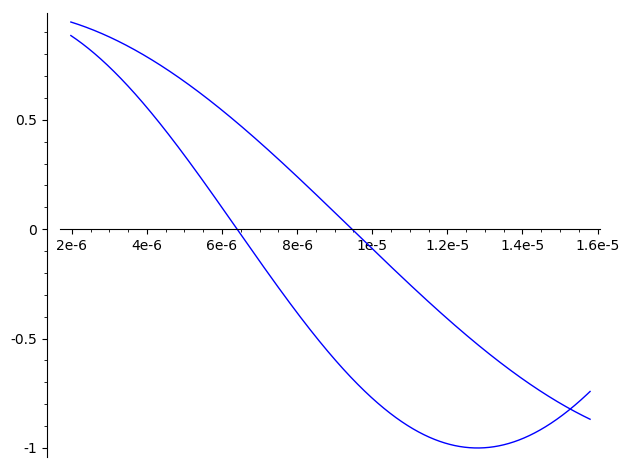

In [101]:
p = sage.plot.graphics.Graphics()
for i in range(n_layers):   p += plot ( cos(k_values_d[i].rhs()* x), lambda_d/32, lambda_d/4)

p.show()

In [102]:
disp_eq_brakes

[6.401944900718174e-06,
 (4.07560470154422e-6)*pi + 6.401944900718174e-06,
 (8.15120940308844e-6)*pi + 6.401944900718174e-06,
 9.46107784453728e-06,
 (6.02310922360187e-6)*pi + 9.46107784453728e-06,
 0.0000120462184472037*pi + 9.46107784453728e-06]

In [103]:
disp_eq_brakes.sort()

In [104]:
for i in range(len(disp_eq_brakes)):
    display(Math(latex(disp_eq_brakes [i].n())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [105]:
disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

-5.91310402814251*(-120757.355468890*bessel_J(1, kappa*rho)*cos(166027.206692757*z) + 99238.7718376256*bessel_J(1, kappa*rho)*sin(166027.206692757*z))*bessel_J(0, kappa*rho)/(-0.490523195032213*kappa*cos(166027.206692757*z) - 0.596886506467048*kappa*sin(166027.206692757*z)) + 809484.743248195*bessel_J(1, kappa*rho)*bessel_J(0, kappa*rho)*cos(245362.362944843*z)/(kappa*sin(245362.362944843*z))

In [106]:
p = sage.plot.graphics.Graphics()
ylim = 100000*5
xeps = lambda_d/1024
p += plot(disp_eq_s.lhs(), xeps, disp_eq_brakes[0])
for i in range(len(disp_eq_brakes)-1):   p += plot (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)

p.show()

ValueError: Variable 'kappa' not found

In [ ]:
h_lst =[]

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        
        h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i].n())
        print(disp_eq_brakes [i+1].n())



In [ ]:
h_lst 

In [ ]:
def find_newton_root(f,x,a,b):
    df = f.diff(x)
    NewtonIt(x)=x-(f/df)(x)
    
    xn=(a+b)/2;                      # initial guess

    print (xn)
    for i in range(10):
        xn=N(NewtonIt(xn),digits=20)

        
        print (xn)

    return xn

In [ ]:
h_lst =[]

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        h_lst += [find_newton_root (disp_eq_s.lhs(),h,disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i].n())
        print(disp_eq_brakes [i+1].n())



In [ ]:
h_lst

In [ ]:
h_sol = h_lst[0]

In [ ]:
h_sol

In [ ]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda rh,ph,z,  i=i: E_rho[i](rh,ph,z).subs(digit_values).subs(h == h_sol).subs(omega_value).subs(kappa == kappa_d1).subs(c_value).subs(k_values_d).subs(A[0] == 1).subs (digit_values)]

In [ ]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda rh,ph,z,  i=i: E_zz[i](rh,ph,z).subs(digit_values).subs(h == h_sol).subs(omega_value).subs(kappa == kappa_d1).subs(c_value).subs(k_values_d).subs(A[0] == 1).subs (digit_values)]

In [ ]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda rh,ph,z,  i=i: H_phi[i](rh,ph,z).subs(digit_values).subs(h == h_sol).subs(omega_value).subs(kappa == kappa_d1).subs(c_value).subs(k_values_d).subs(A[0] == 1).subs (digit_values)]

In [ ]:
[E_rho_sol [1](rho,ph,z) for rho in [0..12]]

In [ ]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):    p += plot ([E_rho_sol[i](rh,ph,z).subs(rh == rho) for rho in [0..12]],(z, i* h_sol, (i+1)*h_sol))
p.show ()


In [ ]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):    p += plot ([E_z_sol[i](rh,ph,z).subs(rh == rho) for rho in [0..12]],(z, i* h_sol, (i+1)*h_sol))
p.show ()


In [ ]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):    p += plot ([H_phi_sol[i](rh,ph,z).subs(rh == rho) for rho in [0..12]],(z, i* h_sol, (i+1)*h_sol))
p.show ()


In [ ]:
exclude_vars = []

In [ ]:
res_rot_H